In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

from utils import *
from models import *
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 500

dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
d = 5
m = 8
t = 200
n = 100000
lamda = 0.2
distance = 0.1
coherent = False

array = ULA(m, lamda)
array.build_sensor_positions(distance)
array.build_array_manifold()

loss_cpu = RMSPE(d, 'cpu')
loss_cuda = RMSPE(d, 'cuda')

path = 'saved_models_rmspe/'

SNRs = [0, 5, 10, 15, 20]
methods = []
mean_mse = {}

In [4]:
# methods.append("MUSIC(R=180)")
# mean_mse["MUSIC(R=180)"] = []
# music_180 = MUSIC(d, array, -torch.pi/2, torch.pi/2, 180)

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

#     results_music_180 = []
#     for i in range(observations.shape[0]):
#         theta_est, _, _ = music_180.estimate(observations[i].T)
#         results_music_180.append(theta_est)
#     results_music_180 = torch.stack(results_music_180, dim=0)
    
#     mse_music_180 = loss_cpu(results_music_180, angles)
#     mean_mse['MUSIC(R=180)'].append(mse_music_180)

In [5]:
# methods.append("MUSIC(R=360)")
# mean_mse["MUSIC(R=360)"] = []
# music_360 = MUSIC(d, array, -torch.pi/2, torch.pi/2, 360)

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

#     results_music_360 = []
#     for i in range(observations.shape[0]):
#         theta_est, _, _ = music_360.estimate(observations[i].T)
#         results_music_360.append(theta_est)
#     results_music_360 = torch.stack(results_music_360, dim=0)
    
#     mse_music_360 = loss_cpu(results_music_360, angles)
#     mean_mse['MUSIC(R=360)'].append(mse_music_360)

In [6]:
# methods.append("MUSIC(R=1800)")
# mean_mse["MUSIC(R=1800)"] = []
# music_1800 = MUSIC(d, array, -torch.pi/2, torch.pi/2, 1800)

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

#     results_music_1800 = []
#     for i in range(observations.shape[0]):
#         theta_est, _, _ = music_1800.estimate(observations[i].T)
#         results_music_1800.append(theta_est)
#     results_music_1800 = torch.stack(results_music_1800, dim=0)
    
#     mse_music_1800 = loss_cpu(results_music_1800, angles)
#     mean_mse['MUSIC(R=1800)'].append(mse_music_1800)

In [7]:
# methods.append("Root-MUSIC")
# mean_mse["Root-MUSIC"] = []
# root_music = Root_MUSIC(d, array)

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

#     results_root_music = root_music.estimate(observations)
#     mse_root_music = loss_cpu(results_root_music, angles)
#     mean_mse['Root-MUSIC'].append(mse_root_music)

In [8]:
# methods.append("DA-MUSIC")
# mean_mse["DA-MUSIC"] = []
# root_music = Root_MUSIC(d, array)

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

#     test_set = DATASET(observations, angles)
#     test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

#     da_music = DA_MUSIC(m, d, array, dev)
#     mean_mse['DA-MUSIC'].append(test(da_music, test_loader, path+'da_music_'+str(snr)+'dB.pth', loss_cuda, dev))

In [9]:
# methods.append("DA-MUSIC v2")
# mean_mse["DA-MUSIC v2"] = []
# root_music = Root_MUSIC(d, array)

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

#     test_set = DATASET(observations, angles)
#     test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

#     da_music_v2 = DA_MUSIC_v2(m, d, array, dev)
#     mean_mse['DA-MUSIC v2'].append(test(da_music_v2, test_loader, path+'da_music_v2_'+str(snr)+'dB.pth', loss_cuda, dev))

In [10]:
methods.append("RNN")
mean_mse["RNN"] = []

for snr in SNRs:

    observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

    test_set = DATASET(observations, angles)
    test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

    rnn = RNN(m, d, dev)
    mean_mse['RNN'].append(test(rnn, test_loader, path+'rnn_'+str(snr)+'dB.pth', loss_cuda, dev))

In [11]:
methods.append("RNN2")
mean_mse["RNN2"] = []

for snr in SNRs:

    observations, angles = generate_data(n, t, d, snr, snr, array, False, coherent)

    test_set = DATASET(observations, angles)
    test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

    rnn = RNN2(m, d, dev)
    mean_mse['RNN2'].append(test(rnn, test_loader, path+'rnn2_'+str(snr)+'dB.pth', loss_cuda, dev))

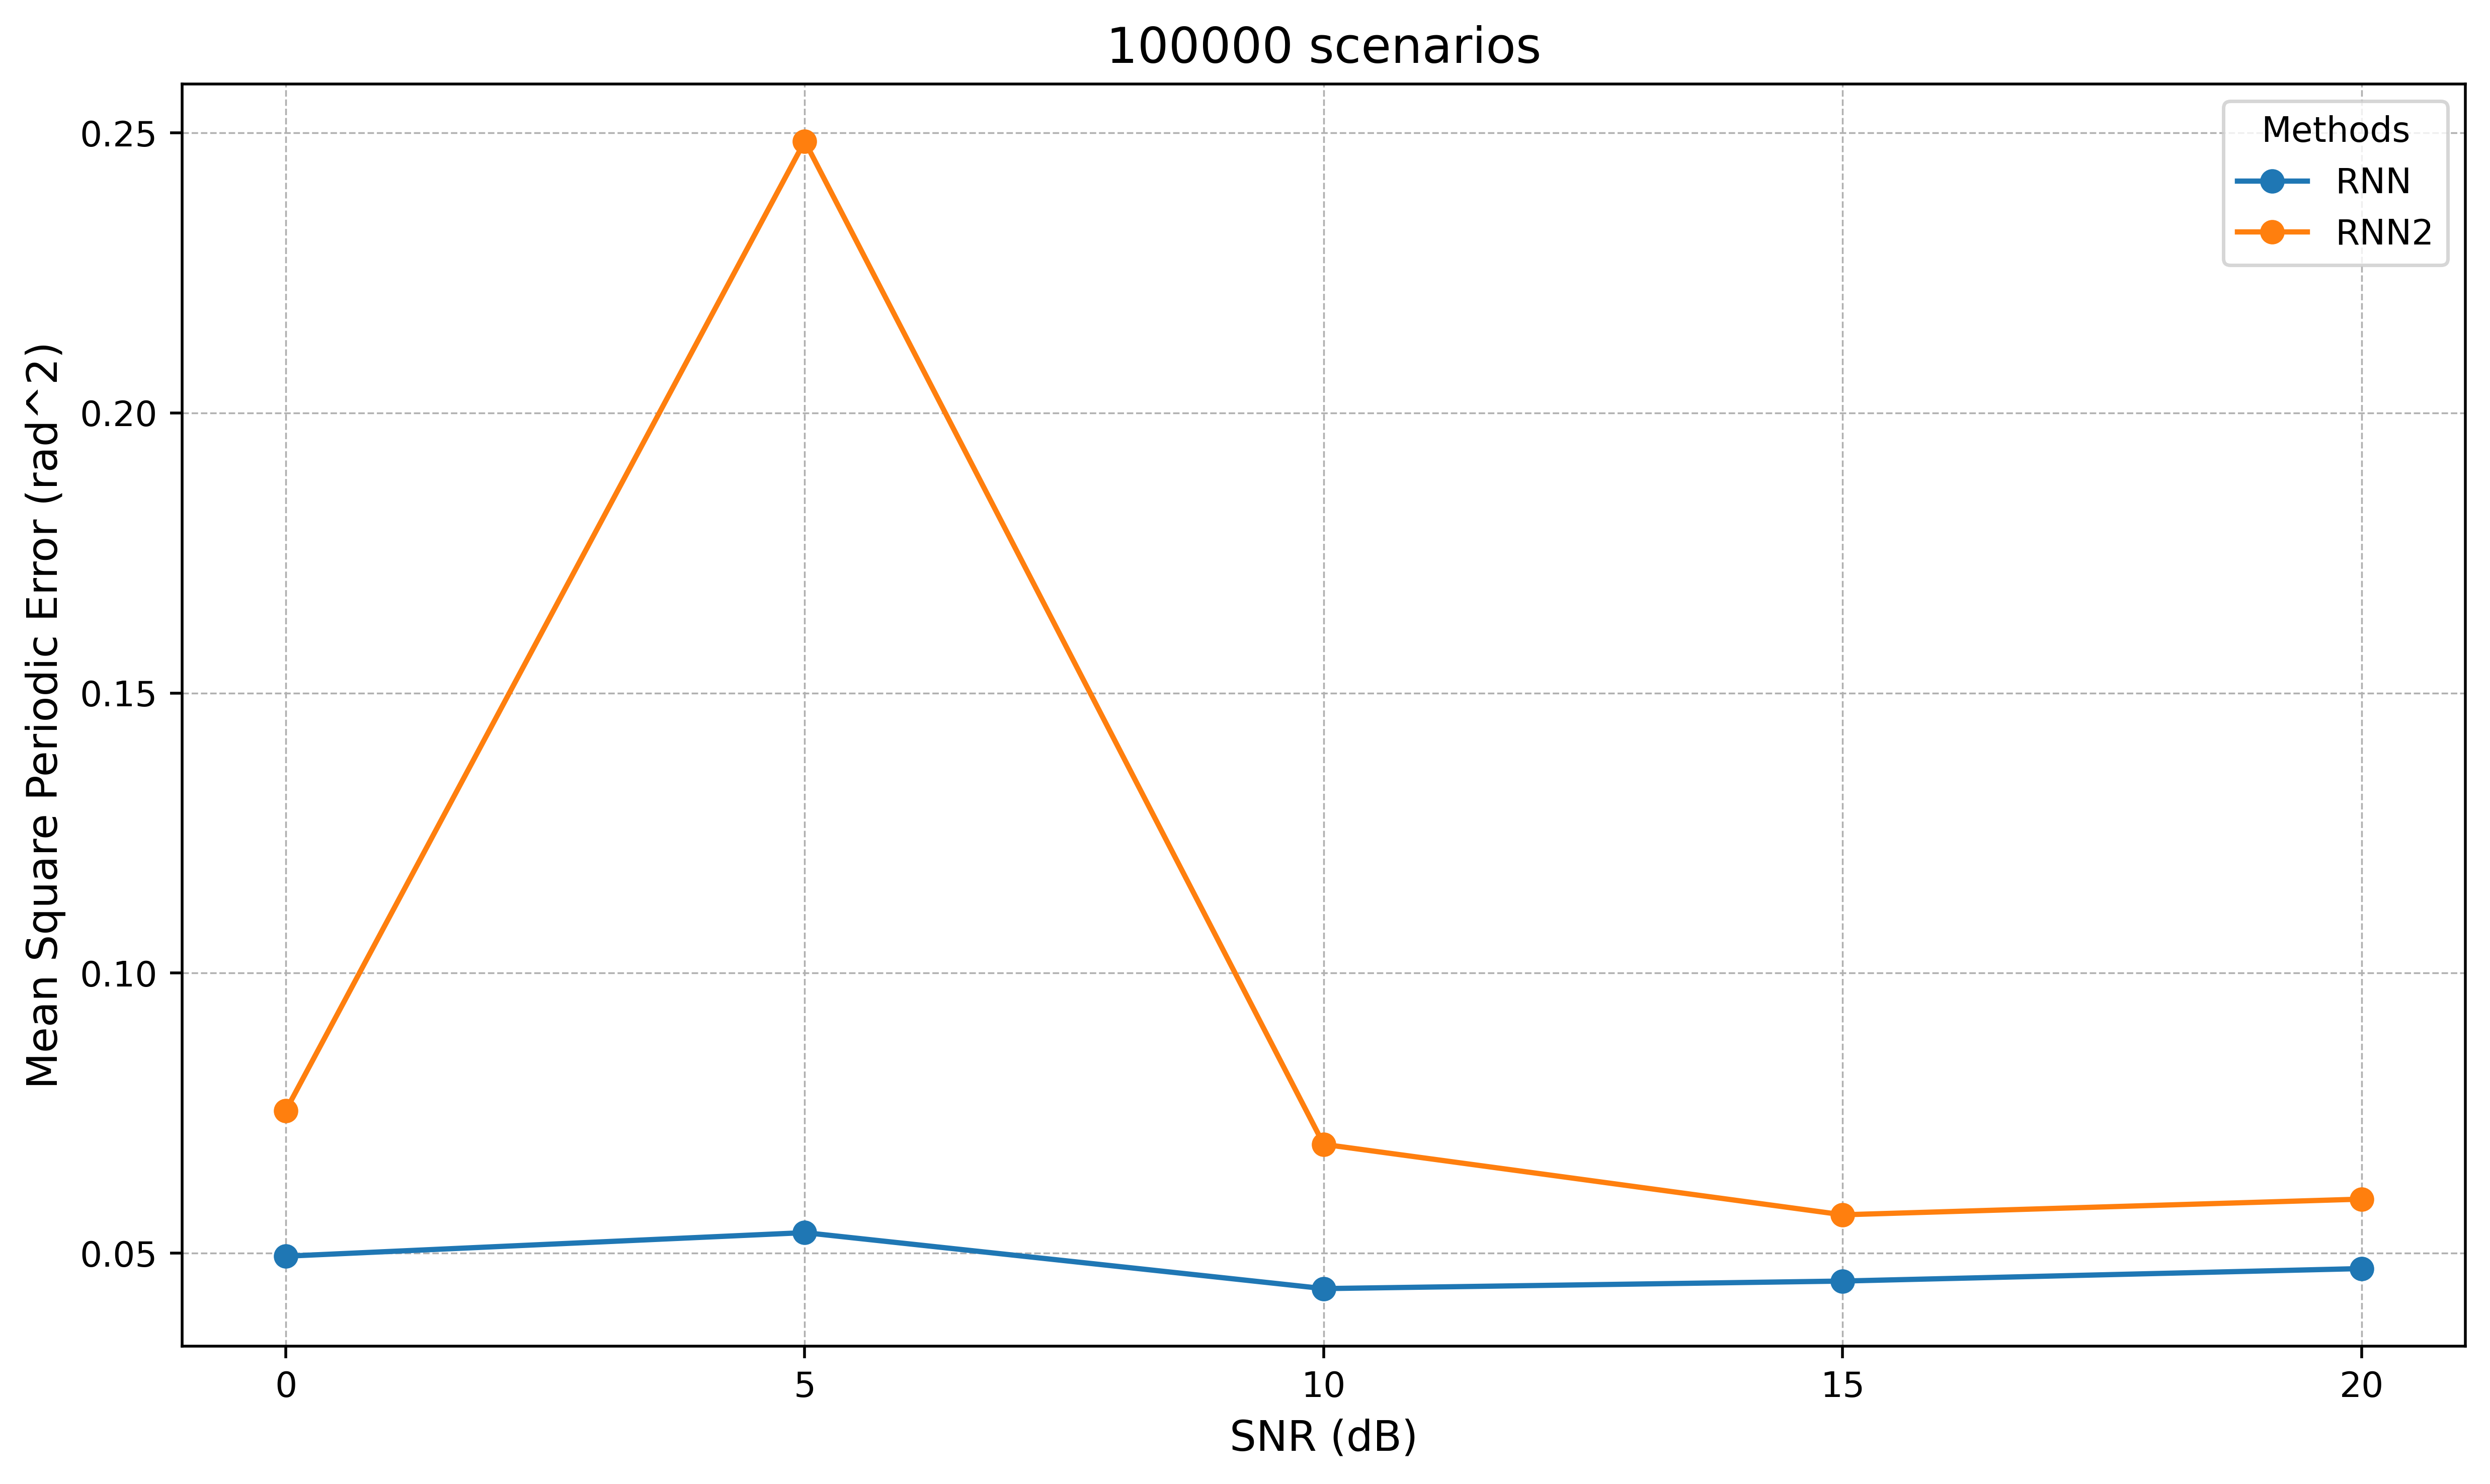

In [12]:
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(SNRs, mean_mse[method], marker='o', label=method)

# plt.yscale("log")
plt.title("{} scenarios".format(n), fontsize=14)
plt.xlabel("SNR (dB)", fontsize=12)
plt.ylabel("Mean Square Periodic Error (rad^2)", fontsize=12)
plt.xticks(SNRs)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Methods")
plt.tight_layout()
plt.show()